In [14]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import binom

# Assuming you have the required functions from source_ACR_py.py
import source_ACR_py as acr

# Initialization
num_S = 2
max_order = 2
num_R = 2
num_total_C = int(binom(max_order + num_S, num_S))
total_complex = acr.make_total_complexes(num_S, max_order)

num_total_R = num_total_C * (num_total_C - 1)

path = "/Users/hyukpyohong/Dropbox/CRN_dynamicACR/Codes/data/"

# Load data
# Warning: matrices data might be loaded as their transposes.
list_acr_id = pd.read_csv(path + f"python_list_acr_id_S{num_S}R{num_R}_max_ord{max_order}.csv", header=None).transpose().to_numpy()
list_unbnd_id = pd.read_csv(path + f"python_list_unbnd_id_S{num_S}R{num_R}_max_ord{max_order}.csv", header=None).transpose().to_numpy()
matrix_R_id = pd.read_csv(path + f"python_matrix_R_id_S{num_S}R{num_R}_max_ord{max_order}.csv", header=None).transpose().to_numpy()

net_list_with_acr = np.where(list_acr_id[0, :] > 0)[0]
num_total_net = list_acr_id.shape[1]

In [15]:
plot_array = [None] * num_total_net
group_list = np.zeros(num_total_net, dtype=int)

for check_net_id in range(1, num_total_net + 1):
#for check_net_id in range(1, 5):
    if check_net_id % 10 == 1:
        print(f"======= Drawing network {check_net_id:4} =======")
    
    list_R_id = matrix_R_id[:, check_net_id - 1]
    list_source_id = np.zeros(num_R, dtype=int)
    list_product_id = np.zeros(num_R, dtype=int)

    for i in range(num_R):
        s_id, p_id = acr.reaction_to_complex(list_R_id[i], num_total_C)
        list_source_id[i] = s_id
        list_product_id[i] = p_id

    source_mat = total_complex[:, list_source_id-1]
    product_mat = total_complex[:, list_product_id-1]
    
    network_txt, network_txt_short = acr.crn_writing(source_mat, product_mat)
    acr_id = list_acr_id[:, check_net_id - 1]
    unbnd_id = list_unbnd_id[:, check_net_id - 1]

    plot_array[check_net_id - 1] = acr.crn_embedding_info(source_mat, product_mat, acr_id, unbnd_id)
    group_list[check_net_id - 1] = acr.grouping_network(source_mat, product_mat, acr_id, unbnd_id)
    plt.close()
    

======= Drawing network    1 =======
======= Drawing network   11 =======
======= Drawing network   21 =======
======= Drawing network   31 =======
======= Drawing network   41 =======
======= Drawing network   51 =======
======= Drawing network   61 =======
======= Drawing network   71 =======
======= Drawing network   81 =======
======= Drawing network   91 =======
======= Drawing network  101 =======
======= Drawing network  111 =======
======= Drawing network  121 =======
======= Drawing network  131 =======
======= Drawing network  141 =======
======= Drawing network  151 =======
======= Drawing network  161 =======
======= Drawing network  171 =======
======= Drawing network  181 =======
======= Drawing network  191 =======
======= Drawing network  201 =======
======= Drawing network  211 =======
======= Drawing network  221 =======
======= Drawing network  231 =======
======= Drawing network  241 =======
======= Drawing network  251 =======
======= Drawing network  261 =======
=

In [19]:
plt.close()

In [5]:
path = "/Users/hyukpyohong/Dropbox/CRN_dynamicACR/Codes/plots/"
layout1 = (3, 4)
num_grid = np.prod(layout1)
blank = plt.figure()

p_arr_total = plot_array
gp_size_check = np.zeros(25, dtype=int)

for i in group_list:
    gp_size_check[i - 1] += 1

for gp_id in range(1, 26):
    p_arr_subset = [p_arr_total[i - 1] for i in np.where(group_list == gp_id)[0] + 1]
    p_arr = p_arr_subset
    tmp1 = len(p_arr)

    if tmp1 % num_grid != 0:
        for i in range(1, num_grid - (tmp1 % num_grid) + 1):
            p_arr.append(blank)

    num_paper = int(len(p_arr) / num_grid)

    for iter_paper in range(1, num_paper + 1):
        if iter_paper % 10 == 1:
            print(f"======= Drawing paper sheet {iter_paper:4} =======")
        
        plt.figure(figsize=(12, 9))
        for i in range(num_grid):
            plt.subplot(layout1[0], layout1[1], i + 1)
            plt.imshow(p_arr[num_grid * (iter_paper - 1) + i].show(), cmap='viridis')
            plt.axis('off')

        plt.savefig(f"{path}Grouped_S{num_S}R{num_R}_max_ord{max_order}_gp{gp_id}_{iter_paper}.png")

NameError: name 'p_arr_2s3r' is not defined

<Figure size 640x480 with 0 Axes>

In [5]:
check_net_id

435

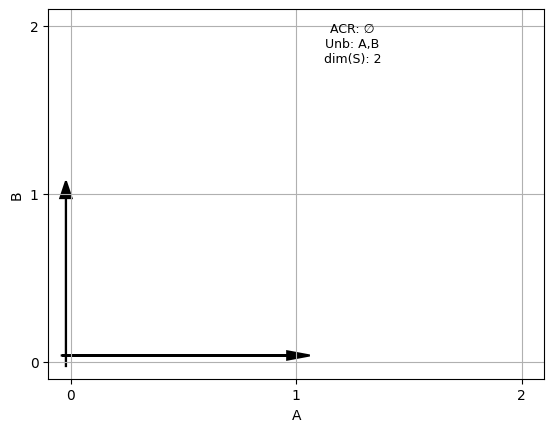

In [3]:
plot_array[1][0]

In [17]:
group_list

array([101, 203, 203, 203, 110, 101, 212, 203, 212, 100, 110, 212, 212,
       212, 201, 201, 201, 101, 202, 201, 201, 201, 100, 212, 221, 221,
       221, 221, 221, 203, 203, 203, 110, 101, 212, 203, 212, 110, 110,
       212, 212, 212, 201, 201, 201, 101, 202, 201, 201, 201, 110, 212,
       221, 221, 221, 221, 221, 203, 102, 202, 201, 202, 102, 202, 212,
       212, 212, 212, 212, 120, 221, 221, 201, 102, 202, 120, 221, 202,
       202, 120, 221, 221, 120, 221, 203, 212, 201, 212, 203, 212, 212,
       212, 212, 212, 212, 221, 221, 221, 201, 202, 100, 221, 221, 212,
       212, 221, 221, 221, 221, 221, 202, 203, 202, 102, 202, 212, 212,
       212, 202, 202, 120, 221, 221, 203, 102, 202, 100, 221, 202, 202,
       120, 221, 221, 120, 221, 101, 200, 202, 200, 100, 100, 202, 202,
       202, 200, 200, 200, 101, 202, 200, 200, 200, 100, 200, 200, 200,
       220, 200, 220, 203, 203, 203, 110, 110, 212, 212, 212, 201, 201,
       201, 101, 203, 201, 201, 201, 100, 200, 201, 221, 201, 20